<a href="https://colab.research.google.com/github/christymarc/BeachImageClassification/blob/main/BeachClassificationModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import fastai
from pathlib import Path
from PIL import Image
from urllib import request
from io import BytesIO
import pandas as pd
import urllib.request
import requests
import tensorflow as tf
from keras.preprocessing.image import *
import os
import shutil
import cv2
import imghdr

In [19]:
CLASSES = ['cleanBeach', 'dirtyBeach']
HEADERS = {
    "user-agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36"
}
VALID_PCT = 0.2
IMG_SIZE = 224
BATCH_SIZE = 5
DATA_PATH = Path('/content/data/')

In [20]:
def loadImage(URL):
    with urllib.request.urlopen(URL) as url:
        img = image.load_img(BytesIO(url.read()), target_size=(IMG_SIZE, IMG_SIZE))
    return image.img_to_array(img)

Loading in Clean Beach Data

In [21]:
file = 'cleanBeaches copy.txt'
opened_file = open(DATA_PATH/file, 'r')
lines = opened_file.readlines()

In [22]:
len(lines)

10

In [23]:
count = 0
path = "data/cleanBeach/"
for line in lines:
    count += 1
    line = line.strip()
    print(count)
    try:
        r = requests.get(line, headers=HEADERS, verify=False)
        with open(path + f'{count:05}' + '.jpg', 'wb') as outfile:
            outfile.write(r.content)
    except requests.exceptions.ReadTimeout: 
        pass

1
2


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


3
4


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


5
6


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


7
8


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


9
10


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Loading in Dirty Beach Data

In [24]:
file = 'dirtyBeaches copy.txt'
opened_file = open(DATA_PATH/file, 'r')
lines = opened_file.readlines()

In [25]:
len(lines)

10

In [26]:
count = 0
path = "data/dirtyBeach/"
for line in lines:
    count += 1
    line = line.strip()
    try:
        r = requests.get(line, headers=HEADERS, verify=False)
        with open(path + f'{count:05}' + '.jpg', 'wb') as outfile:
            outfile.write(r.content)
    except requests.exceptions.ReadTimeout: 
        pass

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

Delete extra class (".ipynb_checkpoints")

In [27]:
os.listdir("/content/data")

['cleanBeaches copy.txt', 'cleanBeach', 'dirtyBeaches copy.txt', 'dirtyBeach']

In [12]:
shutil.rmtree("data/.ipynb_checkpoints") #be careful with shutil.rmtree() because it deletes every tree in that path. In other words, do not make mistakes.

In [13]:
os.listdir("/content/data")

['cleanBeaches copy.txt', 'cleanBeach', 'dirtyBeaches copy.txt', 'dirtyBeach']

ensuring correct image type

In [28]:
def check_images(s_dir, ext_list):
    bad_images=[]
    bad_ext=[]
    s_list= os.listdir(s_dir)
    for klass in s_list:
        klass_path=os.path.join (s_dir, klass)
        print ('processing class directory ', klass)
        if os.path.isdir(klass_path):
            file_list=os.listdir(klass_path)
            for f in file_list:               
                f_path=os.path.join (klass_path,f)
                tip = imghdr.what(f_path)
                if ext_list.count(tip) == 0:
                  bad_images.append(f_path)
                if os.path.isfile(f_path):
                    try:
                        img=cv2.imread(f_path)
                        shape=img.shape
                    except:
                        print('file ', f_path, ' is not a valid image file')
                        bad_images.append(f_path)
                else:
                    print('*** fatal error, you a sub directory ', f, ' in class directory ', klass)
        else:
            print ('*** WARNING*** you have files in ', s_dir, ' it should only contain sub directories')
    return bad_images, bad_ext

source_dir =r'/content/data'
good_exts=['jpg', 'png', 'jpeg', 'gif', 'bmp' ] # list of acceptable extensions
bad_file_list, bad_ext_list=check_images(source_dir, good_exts)
if len(bad_file_list) !=0:
    print('improper image files are listed below')
    for i in range (len(bad_file_list)):
        print (bad_file_list[i])
        # Load .png image
        image = cv2.imread(bad_file_list[i])
        # Save .jpg image
        cv2.imwrite(bad_file_list[i], image, [int(cv2.IMWRITE_JPEG_QUALITY), 100])
else:
    print(' no improper image files were found')

processing class directory  cleanBeaches copy.txt
*** WARNING*** you have files in  /content/data  it should only contain sub directories
processing class directory  cleanBeach
processing class directory  dirtyBeaches copy.txt
*** WARNING*** you have files in  /content/data  it should only contain sub directories
processing class directory  dirtyBeach
improper image files are listed below
/content/data/dirtyBeach/00004.jpg
/content/data/dirtyBeach/00008.jpg


Split data into training and verification data

In [29]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  DATA_PATH,
  validation_split=0.5,
  subset="training",
  seed=123,
  image_size=(IMG_SIZE, IMG_SIZE),
  batch_size=BATCH_SIZE)

Found 20 files belonging to 2 classes.
Using 10 files for training.


In [30]:
valid_ds = tf.keras.utils.image_dataset_from_directory(
  DATA_PATH,
  validation_split=0.5,
  subset="validation",
  seed=123,
  image_size=(IMG_SIZE, IMG_SIZE),
  batch_size=BATCH_SIZE)

Found 20 files belonging to 2 classes.
Using 10 files for validation.


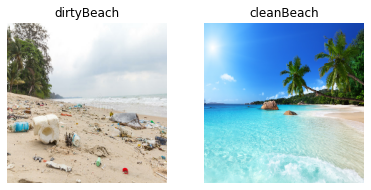

In [31]:
import matplotlib.pyplot as plt
import matplotlib.figure
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(2):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(CLASSES[labels[i]])
    plt.axis("off")

In [ ]:
folder = 'cleanBeach'
file = 'cleanBeaches.txt'
path_text_files = Path('data_text_files/')
path = Path('data/')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(dest, url_file=path_text_files/file, max_pics=300)

FileNotFoundError: ignored

In [ ]:
folder = 'dirtyBeach'
file = 'dirtyBeaches.txt'
path_text_files = Path('data_text_files/')
path = Path('data/')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(dest, url_file=path_text_files/file, max_pics=300)

In [ ]:
os.listdir("/content/data") #First find where the ".ipynb_checkpoints" is located.

['dirtyBeach', 'cleanBeach']

In [ ]:
shutil.rmtree("data/.ipynb_checkpoints") #be careful with shutil.rmtree() because it deletes every tree in that path. In other words, do not make mistakes.

FileNotFoundError: ignored

In [ ]:
fnames = get_image_files(path)
def label_func(x): return x.parent.name
dls = ImageDataLoaders.from_path_func(path, fnames, label_func, valid_pct=VALID_PCT, seed=42, item_tfms=Resize(224), bs=32)

In [ ]:
for c in class_names:
    print(c)
    failed = verify_images(path/c)
    failed.map(Path.unlink)

cleanBeach
zip argument #1 must support iteration
dirtyBeach
zip argument #1 must support iteration


In [ ]:
dls.valid.show_batch(max_n=4, n_rows=1)

fastai.vision.data.ImageDataLoaders